<a href="https://colab.research.google.com/github/PortugalJip2022/Portugal2022/blob/main/20230529_%E6%B0%B4%E8%B0%B7%E7%B7%A8%E9%9B%86.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
train_master = pd.read_csv('https://raw.githubusercontent.com/PortugalJip2022/image-recognition/main/sample_submit.tsv', sep='\t')
train_master.head()

,test_0.jpg,2
0,test_1.jpg,4
1,test_2.jpg,5
2,test_3.jpg,4
3,test_4.jpg,3
4,test_5.jpg,1


In [ ]:
!git clone https://github.com/PortugalJip2022/image-recognition.git

Cloning into 'image-recognition'...
remote: Enumerating objects: 51, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 51 (delta 12), reused 1 (delta 0), pack-reused 15
Receiving objects: 100% (51/51), 19.35 MiB | 10.95 MiB/s, done.
Resolving deltas: 100% (13/13), done.


In [ ]:
!unzip /content/image-recognition/mnist/train_1.zip
!unzip /content/image-recognition/mnist/train_2.zip

!unzip /content/image-recognition/mnist/test.zip


ストリーミング出力は最後の 5000 行に切り捨てられました。
 extracting: train_2/train_55003.jpg  
 extracting: train_2/train_55004.jpg  
 extracting: train_2/train_55005.jpg  
 extracting: train_2/train_55006.jpg  
 extracting: train_2/train_55007.jpg  
 extracting: train_2/train_55008.jpg  
 extracting: train_2/train_55009.jpg  
 extracting: train_2/train_55010.jpg  
 extracting: train_2/train_55011.jpg  
 extracting: train_2/train_55012.jpg  
 extracting: train_2/train_55013.jpg  
 extracting: train_2/train_55014.jpg  
 extracting: train_2/train_55015.jpg  
 extracting: train_2/train_55016.jpg  
 extracting: train_2/train_55017.jpg  
 extracting: train_2/train_55018.jpg  
 extracting: train_2/train_55019.jpg  
 extracting: train_2/train_55020.jpg  
 extracting: train_2/train_55021.jpg  
 extracting: train_2/train_55022.jpg  
 extracting: train_2/train_55023.jpg  
 extracting: train_2/train_55024.jpg  
 extracting: train_2/train_55025.jpg  
 extracting: train_2/train_55026.jpg  
 extracting: train_2/train_55027

In [ ]:
import shutil

shutil.move('/content/train_1','/content/train')


'/content/train/train_1'

In [ ]:
import os

# フォルダ内のファイル数確認
path =  "/content/test"
files = os.listdir(path)
print(len(files))

10000


In [ ]:

file_name = "/content"
# !rm -rf $file_name
!mkdir train
#!mkdir $file_name && mkdir $file_name/train

In [ ]:
import cv2

In [ ]:
!pip install category_encoders

# ライブラリの読み込み
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# 必須パッケージ
import glob

import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 1.6 MB/s eta 0:00:00


In [ ]:

#データ読込
df = pd.read_csv('https://raw.githubusercontent.com/PortugalJip2022/Portugal2022/main/bank-full.csv',delimiter=";")

#yのフラグを追加
df['y_flg']=df['y'].apply(lambda x : 1 if x == 'yes' else 0)

#変数加工

#連続値範囲指定
df['age_60'] = np.fmin(60,df['age'])
df['balance_5000'] = np.fmax(-1,df['balance'])
df['balance_5000'] = np.fmin(5000,df['balance_5000'])

#カテゴリまとめ作業
df['C_previous_b'] = df['previous'].apply(lambda x : x if x in (0,1,2) else 3)
df['C_pdays_b'] = pd.cut(x=df['pdays'], bins=[-999,-1,60,90,120,999],labels=False)



#変数をカテゴリ変数化
cols = ["job", "marital", "education", "housing", "loan", "poutcome", "C_previous_b","C_pdays_b"]
#cols = ["job", "marital", "education", "housing", "loan", "poutcome", "C_previous_b","C_pdays_b"]
ce_df = ce.OrdinalEncoder(cols=cols, handle_unknown='impute')
# ↑xgbモデルの場合はこれで問題なし（ダミー変数変換したものと同じ結果出力）
#ce_df = ce.OneHotEncoder(cols=cols, handle_unknown='impute')  #ダミー変数

df = ce_df.fit_transform(df)

df = df.drop("y", axis=1)
df = df.drop("age", axis=1)
df = df.drop("default", axis=1)
df = df.drop("balance", axis=1)
df = df.drop("contact", axis=1)
df = df.drop("day", axis=1)
df = df.drop("month", axis=1)
df = df.drop("duration", axis=1)
df = df.drop("campaign", axis=1)
df = df.drop("pdays", axis=1)
df = df.drop("previous", axis=1)



In [ ]:
#lightGBMモデル作成（共有会デモ用からコピーして編集）

#勾配ブースティングモデルパッケージ
import lightgbm as lgb
import pickle

#サンプリング（モデル作成データ、モデル検証データ作成）
train_df, test_df = train_test_split(df, test_size=0.5, random_state=3)

print(train_df.index.size)
print(test_df.index.size)

col = "y_flg"
train_y = train_df[col]
train_x = train_df.drop(col, axis=1)

val_y = test_df[col]
val_x = test_df.drop(col, axis=1)

train_data = lgb.Dataset(train_x,label=train_y)
eval_data = lgb.Dataset(val_x, label=val_y)


#  パラメータ設定_ver1.0
param = {
         'objective': 'binary',
         'learning_rate': 0.01,            # 学習率（初期値0.1）
         'max_depth':0,
         'eval_metric':'auc',
         'num_leaves': 50,                 # 1本の木の最大葉枚数
         'min_data_in_leaf': 100,          # データの最小数（初期値20）
         'metric':'binary_logloss'
         }

#モデル作成コード
gbm = lgb.train(param,
                train_data,
                num_boost_round=100
                )


#モデル保存
with open('model.pkl','wb')as f:
  pickle.dump(gbm,f)

22605
22606
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Info] Number of positive: 2672, number of negative: 19933
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001663 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 343
[LightGBM] [Info] Number of data points in the train set: 22605, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118204 -> initscore=-2.009549
[LightGBM] [Info] Start training from score -2.009549


In [ ]:
#データにモデルの予測値を追加
predict = gbm.predict(train_x)
train_df["p"] = predict

#AR値の計算
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(train_df['y_flg'],train_df['p'])
ar = 2 * (auc - 0.5) * 100
ar_in = ar

print('【勾配ブースティングモデルAR値】')

print('モデル作成データ：',ar)

#予測確率の計算（モデル検証データ)
predict = gbm.predict(val_x)
test_df['p']=predict

#AR値の計算
auc = roc_auc_score(test_df['y_flg'],test_df['p'])
ar = 2 * (auc - 0.5) * 100
ar_out = ar

print('モデル検証データ：',ar)

【勾配ブースティングモデルAR値】
モデル作成データ： 52.85213887180738
モデル検証データ： 45.21106975668867


In [ ]:
from flask import Flask

app = Flask(__name__)

@app.route('/')
def index():
    return 'Hello world'

if __name__ == '__main__':
    app.run(debug=False, host='0.0.0.0', port=80)

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:80
 * Running on http://172.28.0.12:80
INFO:werkzeug:Press CTRL+C to quit


In [ ]:
get_ipython().system_raw('./ngrok http 6006 &')
!curl -s http://localhost:4040/api/tunnels | python3 -c \
 # "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

Argument expected for the -c option
usage: python3 [option] ... [-c cmd | -m mod | file | -] [arg] ...
Try `python -h' for more information.


In [ ]:
from flask import Flask, render_template

app = Flask(__name__)

@app.route("/")
def index():
    return render_template( "index.html" )

if __name__ == '__main__':
    app.run(port=6006)

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:6006
INFO:werkzeug:Press CTRL+C to quit


In [ ]:
!npm install ngrok express


> ngrok@5.0.0-beta.2 postinstall /content/node_modules/ngrok
> node ./postinstall.js

ngrok - downloading binary https://bin.equinox.io/c/bNyj1mQVY4c/ngrok-v3-stable-linux-amd64.zip
ngrok - downloading progress: ngrok - downloading progress: 0/8900871 (0.00%)ngrok - downloading progress: 2372/8900871 (0.03%)ngrok - downloading progress: 3769/8900871 (0.04%)ngrok - downloading progress: 8513/8900871 (0.10%)ngrok - downloading progress: 14443/8900871 (0.16%)ngrok - downloading progress: 16801/8900871 (0.19%)ngrok - downloading progress: 25103/8900871 (0.28%)ngrok - downloading progress: 25489/8900871 (0.29%)ngrok - downloading progress: 32729/8900871 (0.37%)ngrok - downloading progress: 42865/8900871 (0.48%)ngrok - downloading progress: 45761/8900871 (0.51%)ngrok - downloading progress: 59993/8900871 (0.67%)ngrok - downloading progress: 67777/8900871 (0.76%)ngrok - downloading progress: 73273/8900871 (0.82%)ngrok - downloading progress: 80513/8900871 (0.90%)ngrok - downloading progress:

In [ ]:
ngrok = require("/content/node_modules/ngrok"),

const port = 6000;

const app = express();

app.get("/", (req, res) => {
  res.send("Hello World!");
});

ngrok.connect(port).then((url) => {
  app.listen(port, () => {
    console.log(`Example app listening at http://localhost:${port}`);
    console.log(`Example app listening at ${url}`);
  });
});


SyntaxError: ignored

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os

#matplotlibの日本語設定
!pip install japanize-matplotlib
import japanize_matplotlib

from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 92.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=d62f45d7bac4dc46ff8265c90c8025cb39c8f7e370a5e7a583545ee731c6ffc8
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


##LightGBM書いてみた



In [ ]:
!pip install category_encoders

# ライブラリの読み込み
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

#データ読込
df = pd.read_csv('https://raw.githubusercontent.com/PortugalJip2022/Portugal2022/main/bank-full.csv',delimiter=";")

#yのフラグを追加
df['y_flg']=df['y'].apply(lambda x : 1 if x == 'yes' else 0)

#変数加工

#連続値範囲指定
df['age_60'] = np.fmin(60,df['age'])
df['balance_5000'] = np.fmax(-1,df['balance'])
df['balance_5000'] = np.fmin(5000,df['balance_5000'])

#カテゴリまとめ作業
df['C_previous_b'] = df['previous'].apply(lambda x : x if x in (0,1,2) else 3)
df['C_pdays_b'] = pd.cut(x=df['pdays'], bins=[-999,-1,60,90,120,999],labels=False)

# 必須パッケージ
import glob
import pandas as pd
import numpy as np

import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae

#変数をカテゴリ変数化
cols = ["job", "marital", "education", "housing", "loan", "poutcome", "C_previous_b","C_pdays_b"]
#cols = ["job", "marital", "education", "housing", "loan", "poutcome", "C_previous_b","C_pdays_b"]
ce_df = ce.OrdinalEncoder(cols=cols, handle_unknown='impute')
# ↑xgbモデルの場合はこれで問題なし（ダミー変数変換したものと同じ結果出力）
#ce_df = ce.OneHotEncoder(cols=cols, handle_unknown='impute')  #ダミー変数

df = ce_df.fit_transform(df)

df = df.drop("y", axis=1)
df = df.drop("age", axis=1)
df = df.drop("default", axis=1)
df = df.drop("balance", axis=1)
df = df.drop("contact", axis=1)
df = df.drop("day", axis=1)
df = df.drop("month", axis=1)
df = df.drop("duration", axis=1)
df = df.drop("campaign", axis=1)
df = df.drop("pdays", axis=1)
df = df.drop("previous", axis=1)

# df.dtypes

In [ ]:
#1テスト用に変数削除
df = df.drop("job", axis=1)
df = df.drop("marital", axis=1)
df = df.drop("education", axis=1)
df = df.drop("housing", axis=1)
df = df.drop("loan", axis=1)
df = df.drop("poutcome", axis=1)
df = df.drop("C_previous_b", axis=1)
df = df.drop("C_pdays_b", axis=1)

# データ中身確認
df.head()

,y_flg,age_60,balance_5000
0,0,58,2143
1,0,44,29
2,0,33,2
3,0,47,1506
4,0,33,1


In [ ]:
#lightGBMおためし（共有会デモ用からコピーして編集）

#勾配ブースティングモデルパッケージ
# import xgboost as xgb
import lightgbm as lgb
import pickle

#サンプリング（モデル作成データ、モデル検証データ作成）
train_df, test_df = train_test_split(df, test_size=0.5, random_state=3)

print(train_df.index.size)
print(test_df.index.size)

col = "y_flg"
train_y = train_df[col]
train_x = train_df.drop(col, axis=1)

val_y = test_df[col]
val_x = test_df.drop(col, axis=1)



train_data = lgb.Dataset(train_x,label=train_y)
eval_data = lgb.Dataset(val_x, label=val_y)
#train_data = xgb.DMatrix(train_x, label=train_y)
#eval_data = xgb.DMatrix(val_x, label=val_y)

#  パラメータ設定
param = {'num_leaves': 31, 'objective': 'binary'}
param['metric'] = ['auc', 'binary_logloss']


# xgb_params = {
#     "objective" : "binary",
#    "eval_metric" : "logloss",
#     "max_depth" : 2,
#    "seed" : 2525
# }

results_dict = {}


#モデル作成コード
# num_round = 10
gbm = lgb.train(param, train_data)

# gbm = xgb.train(
#     params = xgb_params,
#     dtrain = train_data,
#     evals = [(train_data, "train")],
#     num_boost_round = 100,
#     early_stopping_rounds = 10,
#     evals_result = results_dict
# )

with open('model.pkl','wb')as f:
  pickle.dump(gbm,f)




22605
22606
[LightGBM] [Info] Number of positive: 2672, number of negative: 19933
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000726 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 299
[LightGBM] [Info] Number of data points in the train set: 22605, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118204 -> initscore=-2.009549
[LightGBM] [Info] Start training from score -2.009549


In [ ]:
#保存したモデルの呼び出し

import pickle

with open('model.pkl','rb') as f:
  model = pickle.load(f)

new_data = test_df
new_data_w = test_df.drop(col, axis=1)
prediction = model.predict(new_data_w)

#AR値の計算
from sklearn.metrics import roc_auc_score

new_data['p'] = prediction
auc = roc_auc_score(new_data['y_flg'],new_data['p'])
ar = 2 * (auc - 0.5) * 100
ar_out = ar

print('モデル検証データ：',ar)

モデル検証データ： 26.839622319597133


In [ ]:
#テスト
from flask import Flask, redirect ,request,render_template,jsonify
import json
import requests
import csv

#サンプル３で追加したもの
import pandas as pd
import numpy as np
import pickle
import glob

with open('model.pkl','rb') as f:
  model = pickle.load(f)


_A = int("35")
_B = int("2808")

# header=["age_60", "balance_5000"]
# data = [_A, _B]

# from pathlib import Path
# def print_lines():
#     print(Path('test.csv').read_text())


data = pd.DataFrame({'age_60':[_A], 'balance_5000':[_B]})
data.to_csv('data.csv',index=False)

o_new_data = pd.read_csv('$project_name/templates/data.csv')
prediction = model.predict(o_new_data)

print(prediction)


In [ ]:
#コピー　lightGBM
#　データにモデルの予測値を追加
gbm.predict
predict = gbm.predict(train_x)
train_df["p"] = predict

#AR値の計算
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(train_df['y_flg'],train_df['p'])
ar = 2 * (auc - 0.5) * 100
ar_in = ar

print('【勾配ブースティングモデルAR値】')

print('モデル作成データ：',ar)

#予測確率の計算（モデル検証データ)
predict = gbm.predict(val_x)
test_df['p']=predict

#AR値の計算
auc = roc_auc_score(test_df['y_flg'],test_df['p'])
ar = 2 * (auc - 0.5) * 100
ar_out = ar

print('モデル検証データ：',ar)


# import matplotlib.pyplot as plt

# #グラフ作成自動化
# list6 = []

# y = [ar_in,ar_out]
# x =  ['IN','OUT']

# df6 = [y,x]

# #グラフ作成
# list6.append(df6)

# fig,ax1=plt.subplots()
# ax1.plot(df6[1],df6[0],color="red",label='AR値')

# #タイトルの表示
# plt.title('AR')
# plt.grid()
# plt.show()


【勾配ブースティングモデルAR値】
モデル作成データ： 50.06112730641661
モデル検証データ： 26.839622319597133


In [ ]:
# 決定木の分岐の可視化
lgb.create_tree_digraph(gbm, 1)

### 共有会デモ用コード

In [ ]:
#　データにモデルの予測値を追加

predict = gbm.predict(train_data)
train_df["p"] = predict

#AR値の計算
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(train_df['y_flg'],train_df['p'])
ar = 2 * (auc - 0.5) * 100
ar_in = ar

print('【勾配ブースティングモデルAR値】')

print('モデル作成データ：',ar)

#予測確率の計算（モデル検証データ)
predict = gbm.predict(eval_data)
test_df['p']=predict

#AR値の計算
auc = roc_auc_score(test_df['y_flg'],test_df['p'])
ar = 2 * (auc - 0.5) * 100
ar_out = ar

print('モデル検証データ：',ar)


import matplotlib.pyplot as plt

#グラフ作成自動化
list6 = []

y = [ar_in,ar_out]
x =  ['IN','OUT']

df6 = [y,x]

#グラフ作成
list6.append(df6)

fig,ax1=plt.subplots()
ax1.plot(df6[1],df6[0],color="red",label='AR値')

#タイトルの表示
plt.title('AR')
plt.grid()
plt.show()


NameError: ignored

In [ ]:

#サンプリング（モデル作成データ、モデル検証データ作成）
train_df, test_df = train_test_split(df, test_size=0.5, random_state=3)

print(train_df.index.size)
print(test_df.index.size)

col = "y_flg"
train_y = train_df[col]
train_x = train_df.drop(col, axis=1)

val_y = test_df[col]
val_x = test_df.drop(col, axis=1)

#勾配ブースティングモデルパッケージ
import xgboost as xgb



train_data = xgb.DMatrix(train_x, label=train_y)
eval_data = xgb.DMatrix(val_x, label=val_y)

xgb_params = {
    "objective" : "binary:logistic",
    "eval_metric" : "logloss",
    "max_depth" : 2,
    "seed" : 2525
}

results_dict = {}


#モデル作成コード

gbm = xgb.train(
    params = xgb_params,
    dtrain = train_data,
    evals = [(train_data, "train")],
    num_boost_round = 100,
    early_stopping_rounds = 10,
    evals_result = results_dict
)




22605
22606
[0]	train-logloss:0.53303
[1]	train-logloss:0.44791
[2]	train-logloss:0.39861
[3]	train-logloss:0.36930
[4]	train-logloss:0.35125
[5]	train-logloss:0.33985
[6]	train-logloss:0.33280
[7]	train-logloss:0.32793
[8]	train-logloss:0.32494
[9]	train-logloss:0.32273
[10]	train-logloss:0.32108
[11]	train-logloss:0.31994
[12]	train-logloss:0.31887
[13]	train-logloss:0.31809
[14]	train-logloss:0.31742
[15]	train-logloss:0.31687
[16]	train-logloss:0.31634
[17]	train-logloss:0.31592
[18]	train-logloss:0.31534
[19]	train-logloss:0.31507
[20]	train-logloss:0.31481
[21]	train-logloss:0.31459
[22]	train-logloss:0.31439
[23]	train-logloss:0.31418
[24]	train-logloss:0.31401
[25]	train-logloss:0.31388
[26]	train-logloss:0.31372
[27]	train-logloss:0.31360
[28]	train-logloss:0.31350
[29]	train-logloss:0.31333
[30]	train-logloss:0.31323
[31]	train-logloss:0.31305
[32]	train-logloss:0.31290
[33]	train-logloss:0.31279
[34]	train-logloss:0.31272
[35]	train-logloss:0.31263
[36]	train-logloss:0.31253

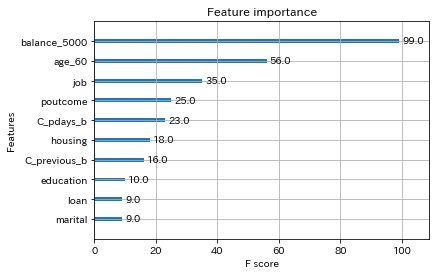

In [ ]:
#決定木の分岐に何回登場したか
import matplotlib.pyplot as plt
xgb.plot_importance(gbm)
plt.show()

#コードサンプル３
calc.py作成

## 設定

In [ ]:
#@title Flask
project_name = "sum_app" #@param {type:"string"}


In [ ]:
#@title サーバー
port = "8000" #@param {type:"string"}
host = True #@param {type:"boolean"}
from google.colab.output import eval_js
host = eval_js(f"google.colab.kernel.proxyPort({str(port)})")


## ソース

In [ ]:
#フォルダ作成
!rm -rf $project_name
!mkdir $project_name && mkdir $project_name/templates && mkdir $project_name/static

In [ ]:
#@title sum.py

%%writefile $project_name/sum.py

from flask import Flask, redirect ,request,render_template,jsonify

import pandas as pd
import numpy as np
import json
import requests

import pickle
import traceback

app = Flask(__name__)

#モデル読み込み
with open('model.pkl','rb') as f:
  model = pickle.load(f)

@app.route("/")
def check():
    return render_template("sum.html")

@app.route("/output", methods=["POST"])
def output():
  try:
    _A = int(request.json["_A"])  #年齢
    _B = int(request.json["_B"])  #残高

    # データ保存
    w_data = pd.DataFrame({'age_60':[_A], 'balance_5000':[_B]})
    w_data.to_csv('w_testdata.csv',index=False)
    o_new_data = pd.read_csv('w_testdata.csv')
    #あてはめ
    p = model.predict(o_new_data)[0]
    p_n=round(p,4)*100

    data = {"result":p,"result":p_n, "_A":_A, "_B":_B, "msg":"%s％の確率で契約しそう"%(p_n)}
    return jsonify(ResultSet=json.dumps(data)), 200
    data = {"result":p}
    return jsonify(ResultSet=json.dumps(data)), 200

  except Exception as err:
    #print(err)
    trace = traceback.format_exc()
    return {"error":trace},500

    #data = {"error":"err"}
    #return jsonify(ResultSet=json.dumps(data)), 500

if __name__ == "__main__":
    import sys
    args = sys.argv
    app.run(debug=True, port=args[1])


Writing sum_app/sum.py


In [ ]:
#@title sum.html

%%writefile $project_name/templates/sum.html


<!doctype html>
<html lang="en">
<head>
    <meta charset="utf-8">
    <title>sum app</title>
</head>
<body>
    年齢<input type="text" value="0" name="_A" /> 残高 <input type="text" value="0" name="_B" /> <button id="run">計算</button><br/>
    <h2>結果</h2>
    <script src="static/post.js"></script>
</body>
</html>



Writing sum_app/templates/sum.html


In [ ]:
#@title post.js

%%writefile $project_name/static/post.js


fetch("https://code.jquery.com/jquery-3.4.1.min.js").then(r=>{return r.text()}).then(t=>eval(t)).then(()=>{
	$=jQuery;
    document.getElementById("run").addEventListener("click",
        function(){
            values=[...document.querySelectorAll("input")].map(_=>_.value);
            $.ajax({
                url:"/output",
                type:"POST",
                data:JSON.stringify({"_A":values[0],"_B":values[1]}),
                contentType:"application/json"
            }).done(data=>{
                $(document.body).append(JSON.parse(data.ResultSet).msg,"<br/>");
            }).fail(data=>{
                $(document.body).append("error","<br/>")
            });
        },false);
});




Writing sum_app/static/post.js


In [ ]:
# !rm -rf $project_name
# !mkdir $project_name && mkdir $project_name/templates && mkdir $project_name/static
# !echo -e '{sum_py_string}' >> $project_name/sum.py
# !echo -e '{calc_py_string}' >> $project_name/calc.py
# !echo -e '{sum_html_string}' >> $project_name/templates/sum.html
# !echo -e '{post_js_string}' >> $project_name/static/post.js

In [ ]:
#@title sum_test.py

%%writefile $project_name/sum.py

from flask import Flask, redirect ,request,render_template,jsonify

import pandas as pd
import numpy as np
import json
import requests

import lightgbm as lgb
import pickle
import traceback

app = Flask(__name__)

#モデル読み込み
with open('model.pkl','rb') as f:
  model = pickle.load(f)

@app.route("/")
def check():
    return render_template("sum.html")

@app.route("/output", methods=["POST"])
def output():

    _A = int(request.json["_A"])  #年齢
    _B = int(request.json["_B"])  #残高
    w_data = pd.DataFrame({'age_60':[_A], 'balance_5000':[_B]})
    w_data.to_csv('w_testdata.csv',index=False)
    o_new_data = pd.read_csv('w_testdata.csv')
    res = model.predict(o_new_data)[0]
    res_n=round(res,4)*100

    data = {"result":res,"result":res_n, "_A":_A, "_B":_B, "msg":"%s％の確率で契約しそう"%(res_n)}
    return jsonify(ResultSet=json.dumps(data)), 200

    # 予測
    #w_data = pd.DataFrame({'age_60':[_A], 'balance_5000':[_B]})
    #w_data.to_csv('w_testdata.csv',index=False)
    #o_new_data = pd.read_csv('w_testdata.csv')


    #p = model.predict(o_new_data)
    #data = {"result":p}
    #return jsonify(ResultSet=json.dumps(data)), 200


if __name__ == "__main__":
    import sys
    args = sys.argv
    app.run(debug=True, port=args[1])


In [ ]:
from flask import Flask, redirect ,request,render_template,jsonify
A="20"
_B=5003

_A = int(A)  #年齢

In [ ]:
import pandas as pd
import json

_A = int(20)  #年齢
_B = int(5003)  #残高
w_data = {'age_60':_A, 'balance_5000':_B}
with open('test.json','w') as f:
  json.dump(w_data,f)

In [ ]:
w_data = pd.DataFrame({'age_60':[_A], 'balance_5000':[_B]})
w_data.to_csv('w_testdata.csv',index=False)
o_new_data = pd.read_csv('w_testdata.csv')

In [ ]:
import pickle


#モデル読み込み
with open('model.pkl','rb') as f:
  model = pickle.load(f)

In [ ]:
o_new_data = pd.read_csv('w_testdata.csv')

In [ ]:
with open('test.json','r') as f:
  data = json.load(f)

df = pd.DataFrame([data])
df.to_csv('test.csv',index=False)
o_new_data =pd.read_csv('test.csv')

In [ ]:
p = model.predict([data])
print(p)

ValueError: ignored

In [ ]:
p = model.predict(o_new_data)
print(p)

[0.3694818]


In [ ]:
o_new_data = pd.read_csv('data.csv')
res = model.predict(o_new_data)[0]
print(res)
p=round(res,2)
print(p)


## webサーバーの起動

In [ ]:
print('①が起動してから、↓のurlにアクセスする')
print(host)

①が起動してから、↓のurlにアクセスする
https://ooaj9yy735-496ff2e9c6d22116-8000-colab.googleusercontent.com/


In [ ]:
#①
!python $project_name/sum.py $port

 * Serving Flask app 'sum'
 * Debug mode: on
 * Running on http://127.0.0.1:8000
Press CTRL+C to quit
 * Restarting with stat
 * Debugger is active!
 * Debugger PIN: 794-195-807
127.0.0.1 - - [21/Jul/2023 05:10:48] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [21/Jul/2023 05:10:48] "GET /static/post.js HTTP/1.1" 200 -
127.0.0.1 - - [21/Jul/2023 05:10:48] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [21/Jul/2023 05:10:55] "POST /output HTTP/1.1" 200 -


# WORK


##hello,World を出す

In [ ]:
# test_app.pypyの中身（Flaskの中）
 #%%writefile test_app.py
from flask import Flask
import sys
port = 6000 #コマンド引数でPORT番号を取得
app = Flask(__name__)

@app.route('/')
def hello_world():
    return 'hello_world'


def main():
    app.debug = True
    app.run()

if __name__ == '__main__':
    main()

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


In [ ]:
#@title sum_test.py

%%writefile test_app.py

from flask import Flask, redirect ,request,render_template,jsonify

import pandas as pd
import numpy as np
import json
import requests

import lightgbm as lgb
import pickle
import traceback

app = Flask(__name__)

#モデル読み込み
with open('model.pkl','rb') as f:
  model = pickle.load(f)

@app.route("/")
def check():
    return render_template("sum.html")

@app.route("/output", methods=["POST"])
def output():
  try:
    _A = int(request.json["_A"])  #年齢
    _B = int(request.json["_B"])  #残高

    # 予測
    w_data = pd.DataFrame({'age_60':[_A], 'balance_5000':[_B]})
    w_data.to_csv('w_testdata.csv',index=False)
    o_new_data = pd.read_csv('w_testdata.csv')

    p = model.predict(o_new_data)
    data = {"result":p}
    return jsonify(ResultSet=json.dumps(data)), 200

  except Exception as err:
    #print(err)
    trace = traceback.format_exc()
    return {"error":trace},500

    #data = {"error":"err"}
    #return jsonify(ResultSet=json.dumps(data)), 500

if __name__ == "__main__":
    import sys
    args = sys.argv
    app.run(debug=True, port=args[1])


Overwriting sum_app/sum.py


In [ ]:
from google.colab import output
PORT = 8000
PATH = ''

output.serve_kernel_port_as_window(PORT, path=PATH)

# サーバー起動
!python3 /content/test_app.py $PORT

<IPython.core.display.Javascript object>

 * Serving Flask app 'test_app'
 * Debug mode: on
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:8000
 * Running on http://172.28.0.12:8000
Press CTRL+C to quit
 * Restarting with stat
 * Debugger is active!
 * Debugger PIN: 145-742-466
127.0.0.1 - - [06/Jul/2023 05:14:07] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [06/Jul/2023 05:14:07] "GET /favicon.ico HTTP/1.1" 404 -


##  chatGPT

In [ ]:
 %%writefile calc.html
<!DOCTYPE html>
<html>
<head>
    <title>計算機</title>
</head>
<body>
    <h1>足し算</h1>
    <form action="/calculate" method="POST">
        <label for="num1">1つ目の値:</label>
        <input type="text" id="num1" name="num1"><br><br>
        <label for="num2">2つ目の値:</label>
        <input type="text" id="num2" name="num2"><br><br>
        <input type="submit" value="計算する">
    </form>
</body>
</html>


Writing calc.html


In [ ]:
 %%writefile result.html
<!DOCTYPE html>
<html>
<head>
    <title>計算結果</title>
</head>
<body>
    <h1>計算結果</h1>
    <p>結果: {{ result }}</p>
</body>
</html>


Overwriting result.html


In [ ]:
from flask import Flask, render_template

app = Flask(__name__)

@app.route('/')
def index():
    return render_template('/content/calc.html')

@app.route('/calculate', methods=['POST'])
def calculate():
    # 計算処理
    return render_template('/content/result.html')

if __name__ == '__main__':
    app.run()


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


In [ ]:
#!pip install flask-ngrok  # ngrokをインストール

from flask import Flask, render_template, request
from flask_ngrok import run_with_ngrok

app = Flask(__name__)
run_with_ngrok(app)  # ngrokを使用してホストを公開

@app.route('/')
def index():
    return render_template('calc.html')

#@app.route('/calculate', methods=['POST'])
#def calculate():
 #   num1 = float(request.form['num1'])
  #  num2 = float(request.form['num2'])
   # result = num1 + num2
    #return render_template('result.html', result=result)

app.run()


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
Exception in thread Thread-12:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/urllib3/connection.py", line 174, in _new_conn
    conn = connection.create_connection(
  File "/usr/local/lib/python3.10/dist-packages/urllib3/util/connection.py", line 95, in create_connection
    raise err
  File "/usr/local/lib/python3.10/dist-packages/urllib3/util/connection.py", line 85, in create_connection
    sock.connect(sa)
ConnectionRefusedError: [Errno 111] Connection refused

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py", line 703, in urlopen
    httplib_response = self._make_request(
  File "/usr/local/lib/python3.10/dist-packag

##てすと

In [ ]:
 %%writefile index.html
<!DOCTYPE html>
<html>
<head>
    <title>Addition Form</title>
</head>
<body>
    <form action="/add" method="POST">
        <input type="number" name="num1" placeholder="Enter the first number" required>
        <input type="number" name="num2" placeholder="Enter the second number" required>
        <button type="submit">Add</button>
    </form>
</body>
</html>


Writing index.html


In [ ]:
 %%writefile result.html
<!DOCTYPE html>
<html>
<head>
    <title>Addition Result</title>
</head>
<body>
    <h1>Result: {{ result }}</h1>
</body>
</html>


Writing result.html


In [ ]:
 %%writefile test_sum.py
from flask import Flask, request, render_template

app = Flask(__name__)

@app.route('/')
def index():
    return render_template('index.html')

@app.route('/add', methods=['POST'])
def add():
    num1 = int(request.form['num1'])
    num2 = int(request.form['num2'])
    result = num1 + num2
    return render_template('result.html', result=result)

if __name__ == '__main__':
    app.run()

Writing test_sum.py


In [ ]:
from google.colab import output
PORT = 6000
PATH = ''

output.serve_kernel_port_as_window(PORT, path=PATH)

# サーバー起動
!python3 /content/test_sum.py $PORT

<IPython.core.display.Javascript object>

 * Serving Flask app 'test_sum'
 * Debug mode: off
 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
^C


In [ ]:
 %%writefile test_index.html
<!DOCTYPE html>
<html lang="ja">
<head>
    <meta charset="UTF-8">
    <meta http-equiv="X-UA-Compatible" content="IE=edge">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>テストWebアプリ</title>
</head>
<body>
    <h1>index.html表示してます</h1>
</body>
</html>

Writing test_index.html


In [ ]:
# test_app.pypyの中身（Flaskの中）
 %%writefile test_view.py
from flask import Flask,render_template
import sys
port = int(sys.argv[1]) #コマンド引数でPORT番号を取得
app = Flask(__name__)

@app.route('/')
def index():
    return render_template('test_index.html')


def main():
    app.debug = True
    app.run(port=port)

if __name__ == '__main__':
    main()

Overwriting test_view.py


In [ ]:
from google.colab import output
PORT = 6000
PATH = ''

output.serve_kernel_port_as_window(PORT, path=PATH)

# サーバー起動
!python3 /content/test_view.py $PORT

<IPython.core.display.Javascript object>

 * Serving Flask app 'test_view'
 * Debug mode: on
 * Running on http://127.0.0.1:6000
Press CTRL+C to quit
 * Restarting with stat
 * Debugger is active!
 * Debugger PIN: 345-641-795
127.0.0.1 - - [01/Jun/2023 05:38:35] "GET / HTTP/1.1" 500 -
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 2552, in __call__
    return self.wsgi_app(environ, start_response)
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 2532, in wsgi_app
    response = self.handle_exception(e)
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 2529, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 1825, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 1823, in full_dispatch_request
    rv = self.dispatch_request()
  File "/usr/local/lib/python3.10/dist-packages/flask/app.p

In [ ]:
import os, time, json
import pandas as pd
import numpy as np
from google.colab import files

def getHost(_port):
    from google.colab.output import eval_js
    return eval_js(f"google.colab.kernel.proxyPort({str(_port)})")

project_name = "colab_flask_streamlit"

flask_port = 8061
streamlit_port = 8062
streamlit_use_tunnel = "localt"

root_path = "/content"
project_path = os.path.join(root_path,project_name)

api_path = os.path.join(project_path,"api")
api_controllers_py_path = os.path.join(api_path,"main.py")

front_path = os.path.join(project_path,"front")
front_app_py_path = os.path.join(front_path,"main.py")

front_app_py_path = os.path.join(front_path,"main.py")

In [ ]:
!rm -i -rf $project_path $project_archive_path
!mkdir $project_path $api_path $front_path $project_path/docker

files.view(project_path)

<IPython.core.display.Javascript object>

In [ ]:
%%writefile $project_path/Makefile
PARENT_DIR:=$(dir $(abspath $(dir $$PWD)))
PROJECT_NAME:=$(shell basename $(dir $(abspath $(lastword $(MAKEFILE_LIST)))))
PROJECT_PATH:=${PARENT_DIR}${PROJECT_NAME}
include .env

init: ## 最初に行う処理です。
	pip install -r ${PROJECT_PATH}/docker/requirements.txt

backup: ## プロジェクトをzip化します。
	zip -r ${BACKUP_OUTPUT} ${PROJECT_PATH}

run: ## FLASKとStreamlitを起動します。
ifeq ($(STREAMLIT_USE_TUNNEL),localt)
	@python ${PROJECT_PATH}/api/run.py ${FLASK_PORT} & python ${PROJECT_PATH}/front/run.py ${STREAMLIT_PORT} & sleep 1 && npx localtunnel --port ${STREAMLIT_PORT}
endif
ifeq ($(STREAMLIT_USE_TUNNEL),localhost)
	@python ${PROJECT_PATH}/api/run.py ${FLASK_PORT} & python ${PROJECT_PATH}/front/run.py ${STREAMLIT_PORT}
endif
	echo Error: make run

docker-up: ## docker-composeでFLASKとStreamlitを起動します。dockerを使う場合はこちらから。
	@docker-compose up

help: ## Display this help screen
	@grep -E '^[a-zA-Z_-]+:.*?## .*$$' Makefile | awk 'BEGIN {FS = ":.*?## "}; {printf "\033[36m%-20s\033[0m %s\n", $$1, $$2}'

Writing /content/colab_flask_streamlit/Makefile


In [ ]:
_env=f"""
FLASK_PORT={flask_port}
STREAMLIT_PORT={streamlit_port}
STREAMLIT_USE_TUNNEL={streamlit_use_tunnel}

""".strip()
!echo -n "$_env" > $env_path
!cat $env_path

FLASK_PORT=8061
STREAMLIT_PORT=8062
STREAMLIT_USE_TUNNEL=localt

In [ ]:
%%writefile $api_path/run.py
import sys
import os

if __name__ == "__main__":
    from main import app
    from flask import Flask
    import uvicorn

    print("#  Start FastAPI !  #")

    port=int(sys.argv[1])
    uvicorn.run(app=app,port=port,host="0.0.0.0")
    print("api: server stop...")

#コードサンプル

## 設定

In [ ]:
#@title Flask
project_name = "sum_app" #@param {type:"string"}


In [ ]:
#@title サーバー
port = "8000" #@param {type:"string"}
host = True #@param {type:"boolean"}
from google.colab.output import eval_js
host = eval_js(f"google.colab.kernel.proxyPort({str(port)})")


## ソース

In [ ]:
#@title sum.py
sum_py_string = '''

from flask import Flask, redirect ,request,render_template,jsonify
import json
import requests

app = Flask(__name__)

@app.route("/")
def check():
    return render_template("sum.html")

@app.route("/output", methods=["POST"])
def output():
    try:
        _A = int(request.json["_A"])
        _B = int(request.json["_B"])
        res = _A + _B
        data = {"result":res, "_A":_A, "_B":_B, "msg":"%s + %s = %s"%(_A,_B,res)}
        return jsonify(ResultSet=json.dumps(data)), 200
    except Exception as err:
        print(err)
        data = {"error":"err"}
        return jsonify(ResultSet=json.dumps(data)), 500

if __name__ == "__main__":
    import sys
    args = sys.argv
    app.run(debug=True, port=args[1])

'''.strip()

In [ ]:
#@title sum.html
sum_html_string = '''

<!doctype html>
<html lang="en">
<head>
    <meta charset="utf-8">
    <title>sum app</title>
</head>
<body>
    <input type="text" value="0" name="_A" /> + <input type="text" value="0" name="_B" /> <button id="run">を計算する</button><br/>
    <h2>結果</h2>
    <script src="static/post.js"></script>
</body>
</html>

'''.strip()

In [ ]:
#@title post.js
post_js_string='''

fetch("https://code.jquery.com/jquery-3.4.1.min.js").then(r=>{return r.text()}).then(t=>eval(t)).then(()=>{
	$=jQuery;
    document.getElementById("run").addEventListener("click",
        function(){
            values=[...document.querySelectorAll("input")].map(_=>_.value);
            $.ajax({
                url:"/output",
                type:"POST",
                data:JSON.stringify({"_A":values[0],"_B":values[1]}),
                contentType:"application/json"
            }).done(data=>{
                $(document.body).append(JSON.parse(data.ResultSet).msg,"<br/>");
            }).fail(data=>{
                $(document.body).append("error","<br/>")
            });
        },false);
});

'''.strip()


## プロジェクトの作成

In [ ]:
!rm -rf $project_name
!mkdir $project_name && mkdir $project_name/templates && mkdir $project_name/static
!echo -e '{sum_py_string}' >> $project_name/sum.py
!echo -e '{sum_html_string}' >> $project_name/templates/sum.html
!echo -e '{post_js_string}' >> $project_name/static/post.js

## webサーバーの起動

In [ ]:
print('①が起動してから、↓のurlにアクセスする')
print(host)

①が起動してから、↓のurlにアクセスする
https://qc2qd3j4g8-496ff2e9c6d22116-8000-colab.googleusercontent.com/


In [ ]:
#①
!python $project_name/sum.py $port

  File "/content/sum_app/sum.py", line 27
    app.run(debug=True,host=0.0.0.0, port=args[1])
                            ^^^^^
SyntaxError: invalid syntax. Perhaps you forgot a comma?


#コードサンプル２
calc.py作成

## 設定

In [ ]:
#@title Flask
project_name = "sum_app" #@param {type:"string"}


In [ ]:
#@title サーバー
port = "8000" #@param {type:"string"}
host = True #@param {type:"boolean"}
from google.colab.output import eval_js
host = eval_js(f"google.colab.kernel.proxyPort({str(port)})")


## ソース

In [ ]:
#フォルダ作成
!rm -rf $project_name
!mkdir $project_name && mkdir $project_name/templates && mkdir $project_name/static

In [ ]:
#@title calc.py

%%writefile $project_name/calc.py

def calc_add(num1,num2):
  return int(num1)+int(num2)


Writing sum_app/calc.py


In [ ]:
#@title sum.py

%%writefile $project_name/sum.py

from flask import Flask, redirect ,request,render_template,jsonify
from calc import calc_add
import json
import requests

app = Flask(__name__)

@app.route("/")
def check():
    return render_template("sum.html")

@app.route("/output", methods=["POST"])
def output():
    try:
        _A = int(request.json["_A"])
        _B = int(request.json["_B"])
        res = calc_add(_A , _B)
        data = {"result":res, "_A":_A, "_B":_B, "msg":"%s + %s = %s"%(_A,_B,res)}
        return jsonify(ResultSet=json.dumps(data)), 200
    except Exception as err:
        print(err)
        data = {"error":"err"}
        return jsonify(ResultSet=json.dumps(data)), 500

if __name__ == "__main__":
    import sys
    args = sys.argv
    app.run(debug=True, port=args[1])



In [ ]:
#@title sum.html

 %%writefile $project_name/templates/sum.html


<!doctype html>
<html lang="en">
<head>
    <meta charset="utf-8">
    <title>sum app</title>
</head>
<body>
    <input type="text" value="0" name="_A" /> + <input type="text" value="0" name="_B" /> <button id="run">を計算する</button><br/>
    <h2>結果</h2>
    <script src="static/post.js"></script>
</body>
</html>



Writing sum_app/templates/sum.html


In [ ]:
#@title post.js

%%writefile $project_name/static/post.js


fetch("https://code.jquery.com/jquery-3.4.1.min.js").then(r=>{return r.text()}).then(t=>eval(t)).then(()=>{
	$=jQuery;
    document.getElementById("run").addEventListener("click",
        function(){
            values=[...document.querySelectorAll("input")].map(_=>_.value);
            $.ajax({
                url:"/output",
                type:"POST",
                data:JSON.stringify({"_A":values[0],"_B":values[1]}),
                contentType:"application/json"
            }).done(data=>{
                $(document.body).append(JSON.parse(data.ResultSet).msg,"<br/>");
            }).fail(data=>{
                $(document.body).append("error","<br/>")
            });
        },false);
});




Writing sum_app/static/post.js


## プロジェクトの作成

In [ ]:
# !rm -rf $project_name
# !mkdir $project_name && mkdir $project_name/templates && mkdir $project_name/static
# !echo -e '{sum_py_string}' >> $project_name/sum.py
# !echo -e '{calc_py_string}' >> $project_name/calc.py
# !echo -e '{sum_html_string}' >> $project_name/templates/sum.html
# !echo -e '{post_js_string}' >> $project_name/static/post.js

## webサーバーの起動

In [ ]:
print('①が起動してから、↓のurlにアクセスする')
print(host)

①が起動してから、↓のurlにアクセスする
https://zxvuppdm5gh-496ff2e9c6d22116-8000-colab.googleusercontent.com/


In [ ]:
#①
!python $project_name/sum.py $port

 * Serving Flask app 'sum'
 * Debug mode: on
 * Running on http://127.0.0.1:8000
Press CTRL+C to quit
 * Restarting with stat
 * Debugger is active!
 * Debugger PIN: 595-639-337
127.0.0.1 - - [30/Jun/2023 00:50:47] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [30/Jun/2023 00:50:48] "GET /static/post.js HTTP/1.1" 200 -
127.0.0.1 - - [30/Jun/2023 00:50:48] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [30/Jun/2023 00:50:49] "POST /output HTTP/1.1" 200 -


In [ ]:
%%writefile sample.py
print("exe化してみます。")
input()

Writing sample.py


In [ ]:

pip install pyinstaller


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 655.0/655.0 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 276.5/276.5 kB 21.1 MB/s eta 0:00:00


In [ ]:
!pyinstaller sample.py --onefile

The 'pathlib' package is an obsolete backport of a standard library package and is incompatible with PyInstaller. Please remove this package (located in /usr/local/lib/python3.10/dist-packages) using
    "/usr/bin/python3" -m pip uninstall pathlib
then try again.


In [ ]:
import PyInstaller